In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import MahalanobisDistance, LOF

### **Loading the Data**

The given data is loaded from the `.csv` format and converted into a pandas dataframe. To verify if the data is loaded correctly, check the first five rows (head) of the dataframe. 
If this step fails, the loading of the data is incorrect.

In [2]:
# Load the data
path: str = r"Datasets\Question-1\glass.csv"
df: pd.DataFrame = pd.read_csv(path)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### **Preprocessing the Data**

Since the entire data is numerical, we preprocess the data to remove empty rows and standardize it.

In [3]:
# Drop the nan rows
df.dropna(inplace=True)

In [4]:
# Standardize the data
target = df["Type"]
df.drop("Type", axis=1, inplace=True)
df = (df - df.mean()) / df.std()
df["Type"] = target
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,1
1,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,1
2,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,1
3,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,1
4,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,1


In [5]:
features =  df.drop("Type", axis=1).values
target = df["Type"]

### **Data Analysis**

The data is plotted on graphs to find our patterns and relationships among the features.

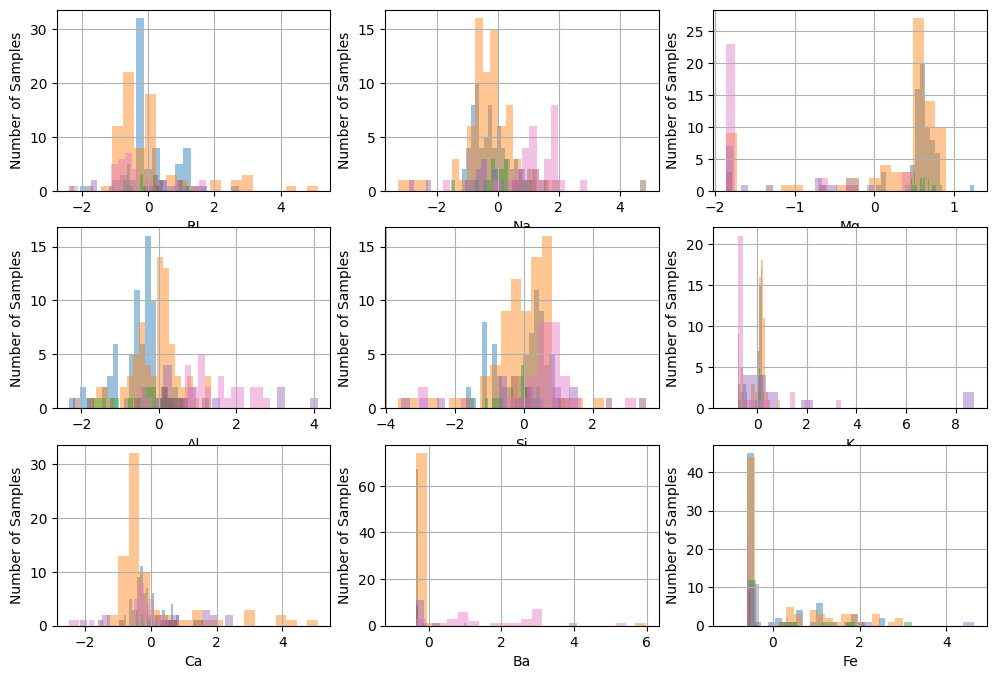

In [6]:
plot = plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    if col == "Type":
        continue
    else:
        plt.subplot(3, 3, i)

    for j in range(1, 8):
        plt.hist(df[df["Type"] == j][col], bins=20, alpha=0.45, label=f"target = {j}")

    plt.xlabel(col)

    plt.ylabel("Number of Samples")
    plt.grid(True)

plt.show()

## **Outlier Detection**

We use two techniques to detect outliers in the data, namely the **Mahalanobis Distance** and **Local Outlier Factor** algorithms.

### **Mahalanobis Distance for Outlier Detection**

The `MahalanobisDistance` implemented in `utils.py` is used to calculate the Mahalanobis Distance of each point in the dataset from the mean of the dataset. The points with the highest Mahalanobis Distances are generally considered to be outliers.

In [7]:
# Detect the anomalies
mhb = MahalanobisDistance(features)

# Get the distances
mhb_dist = mhb.distances()
mhb_dist.shape

(214,)

### **Local Outlier Factor for Outlier Detection**

The `LOF` implemented in `utils.py` is used to calculate the Local Outlier Factor of each point in the dataset. The points with the highest LOFs ($LOF \gg 1$) are generally considered to be outliers.

In [8]:
lof = LOF(features, k=3, min_pts=5)
lof_dist = lof.lofs()
lof_dist.shape

(214,)

### **Threshold Calculation using Otsu Thresholding**

Hacing calculated the Mahalanobis Distances and Local Outlier Factors of the data, we use `OtsuThresholding` implemented in `utils.py` to calculate the threshold for the Mahalanobis Distances and LOFs. The points with Mahalanobis Distances and LOFss greater than the threshold are considered to be outliers.